In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [3]:
rs = np.arange(0.01, 1, 0.02)

R0s = np.arange(1.5, 6.5, 0.1)

param_grid = {'R0': R0s, 'r' : rs}

grid = ParameterGrid(param_grid)

para_dict = list(grid)

In [4]:
rs

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [ ]:
file_dir = '../../../../../../Volumes/My Passport/branching/branching_results/'

In [5]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'

In [7]:
simulation_times = np.loadtxt('simulation_times.txt')

In [15]:
for s in range(300,500):
    s_left = simulation_times[s-300][2]
    para_i = para_dict[s]
    R0 = para_i['R0']
    r = para_i['r']
    if s_left == 500:
        save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
        try:
            old_name = save_dir+"NewInf_R0-{}_r-{}_com.npy.gz".format(np.round(R0,2),np.round(r,2))
            new_name = save_dir+"NewInf_R0-{}_r-{}.npy.gz".format(np.round(R0,2),np.round(r,2))
            os.rename(old_name, new_name)
        except:
            print(R0,np.round(R0,2),r,np.round(r,2))

2.1000000000000005 2.1 0.12999999999999998 0.13
2.1000000000000005 2.1 0.15 0.15
2.1000000000000005 2.1 0.16999999999999998 0.17
2.1000000000000005 2.1 0.18999999999999997 0.19
2.1000000000000005 2.1 0.20999999999999996 0.21
2.1000000000000005 2.1 0.22999999999999998 0.23
2.1000000000000005 2.1 0.24999999999999997 0.25
2.1000000000000005 2.1 0.26999999999999996 0.27
2.1000000000000005 2.1 0.59 0.59
2.1000000000000005 2.1 0.6299999999999999 0.63
2.3000000000000007 2.3 0.08999999999999998 0.09
2.3000000000000007 2.3 0.10999999999999997 0.11
2.3000000000000007 2.3 0.12999999999999998 0.13
2.400000000000001 2.4 0.10999999999999997 0.11


In [16]:
for s in range(300,500):
    s_left = simulation_times[s-300][2]
    para_i = para_dict[s]
    R0 = para_i['R0']
    r = para_i['r']
    if s_left == 200:
        try:
            save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
            file_dir = '../../../../../../Volumes/My Passport/branching/branching_results200/'
            old_file_dir = '../../../../../../Volumes/My Passport/branching/results_ic_300/'

            temp = np.zeros((500,3142,60))
            file_name1 = old_file_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
            f1 = gzip.GzipFile(file_name1, "r")
            temp[:300,:,:] = np.load(f1)


            file_name2 = file_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
            f2 = gzip.GzipFile(file_name2, "r")
            temp[300:500,:,:] = np.load(f2)


            f = gzip.GzipFile(save_dir+"NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2)), "w")
            np.save(file=f, arr=temp)
            f.close()
        
        
        except:
            print(R0,np.round(R0,2),r,np.round(r,2))

In [18]:
def check_file_exists(filename):
    """Check if the file exists.
    if exist return True, else return False
    """
    try:
        f = open(filename, 'r')
        f.close()
        return True
    except FileNotFoundError:
        return False

In [21]:
for s in range(300,500):
    para_i = para_dict[s]
    R0 = para_i['R0']
    r = para_i['r']
    
    save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
    file_name = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
    a = check_file_exists(file_name)
    if a:
        continue
    else:
        print(s, np.round(R0,2),np.round(r,2))

406 2.3 0.13
455 2.4 0.11


In [23]:
para_dict[455]

{'R0': 2.400000000000001, 'r': 0.10999999999999997}

In [3]:
pop = np.loadtxt('pop_new.csv')

In [4]:
Numcounty_mean =  np.zeros((50,10))
Numcounty_std =  np.zeros((50,10))

In [ ]:
Numcounty_mean[:,:6] = np.loadtxt('Numcounty_mean60.txt')
Numcounty_std[:,:6] = np.loadtxt('Numcounty_std60.txt')

In [6]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for i in range(50):
    for j in range(6,10):
        R0 = R0s[j]
        r = rs[i]
        temp = np.zeros((500,3142,60))
        f = gzip.GzipFile(save_dir+"NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2)), "r")
        temp = np.load(f)

        E_daily_per_pop = temp/pop[None,:,None]*100000
        num_county = np.sum(E_daily_per_pop>10,axis=1)

        mean_county = np.mean(num_county,axis=0)[59]
        Numcounty_mean[i,j] = mean_county

        std_county = np.std(num_county,axis=0)[59]
        Numcounty_std[i,j] = std_county

In [5]:
Numcounty_mean = np.loadtxt('Numcounty_mean60-1.txt')
Numcounty_std = np.loadtxt('Numcounty_std60-1.txt')

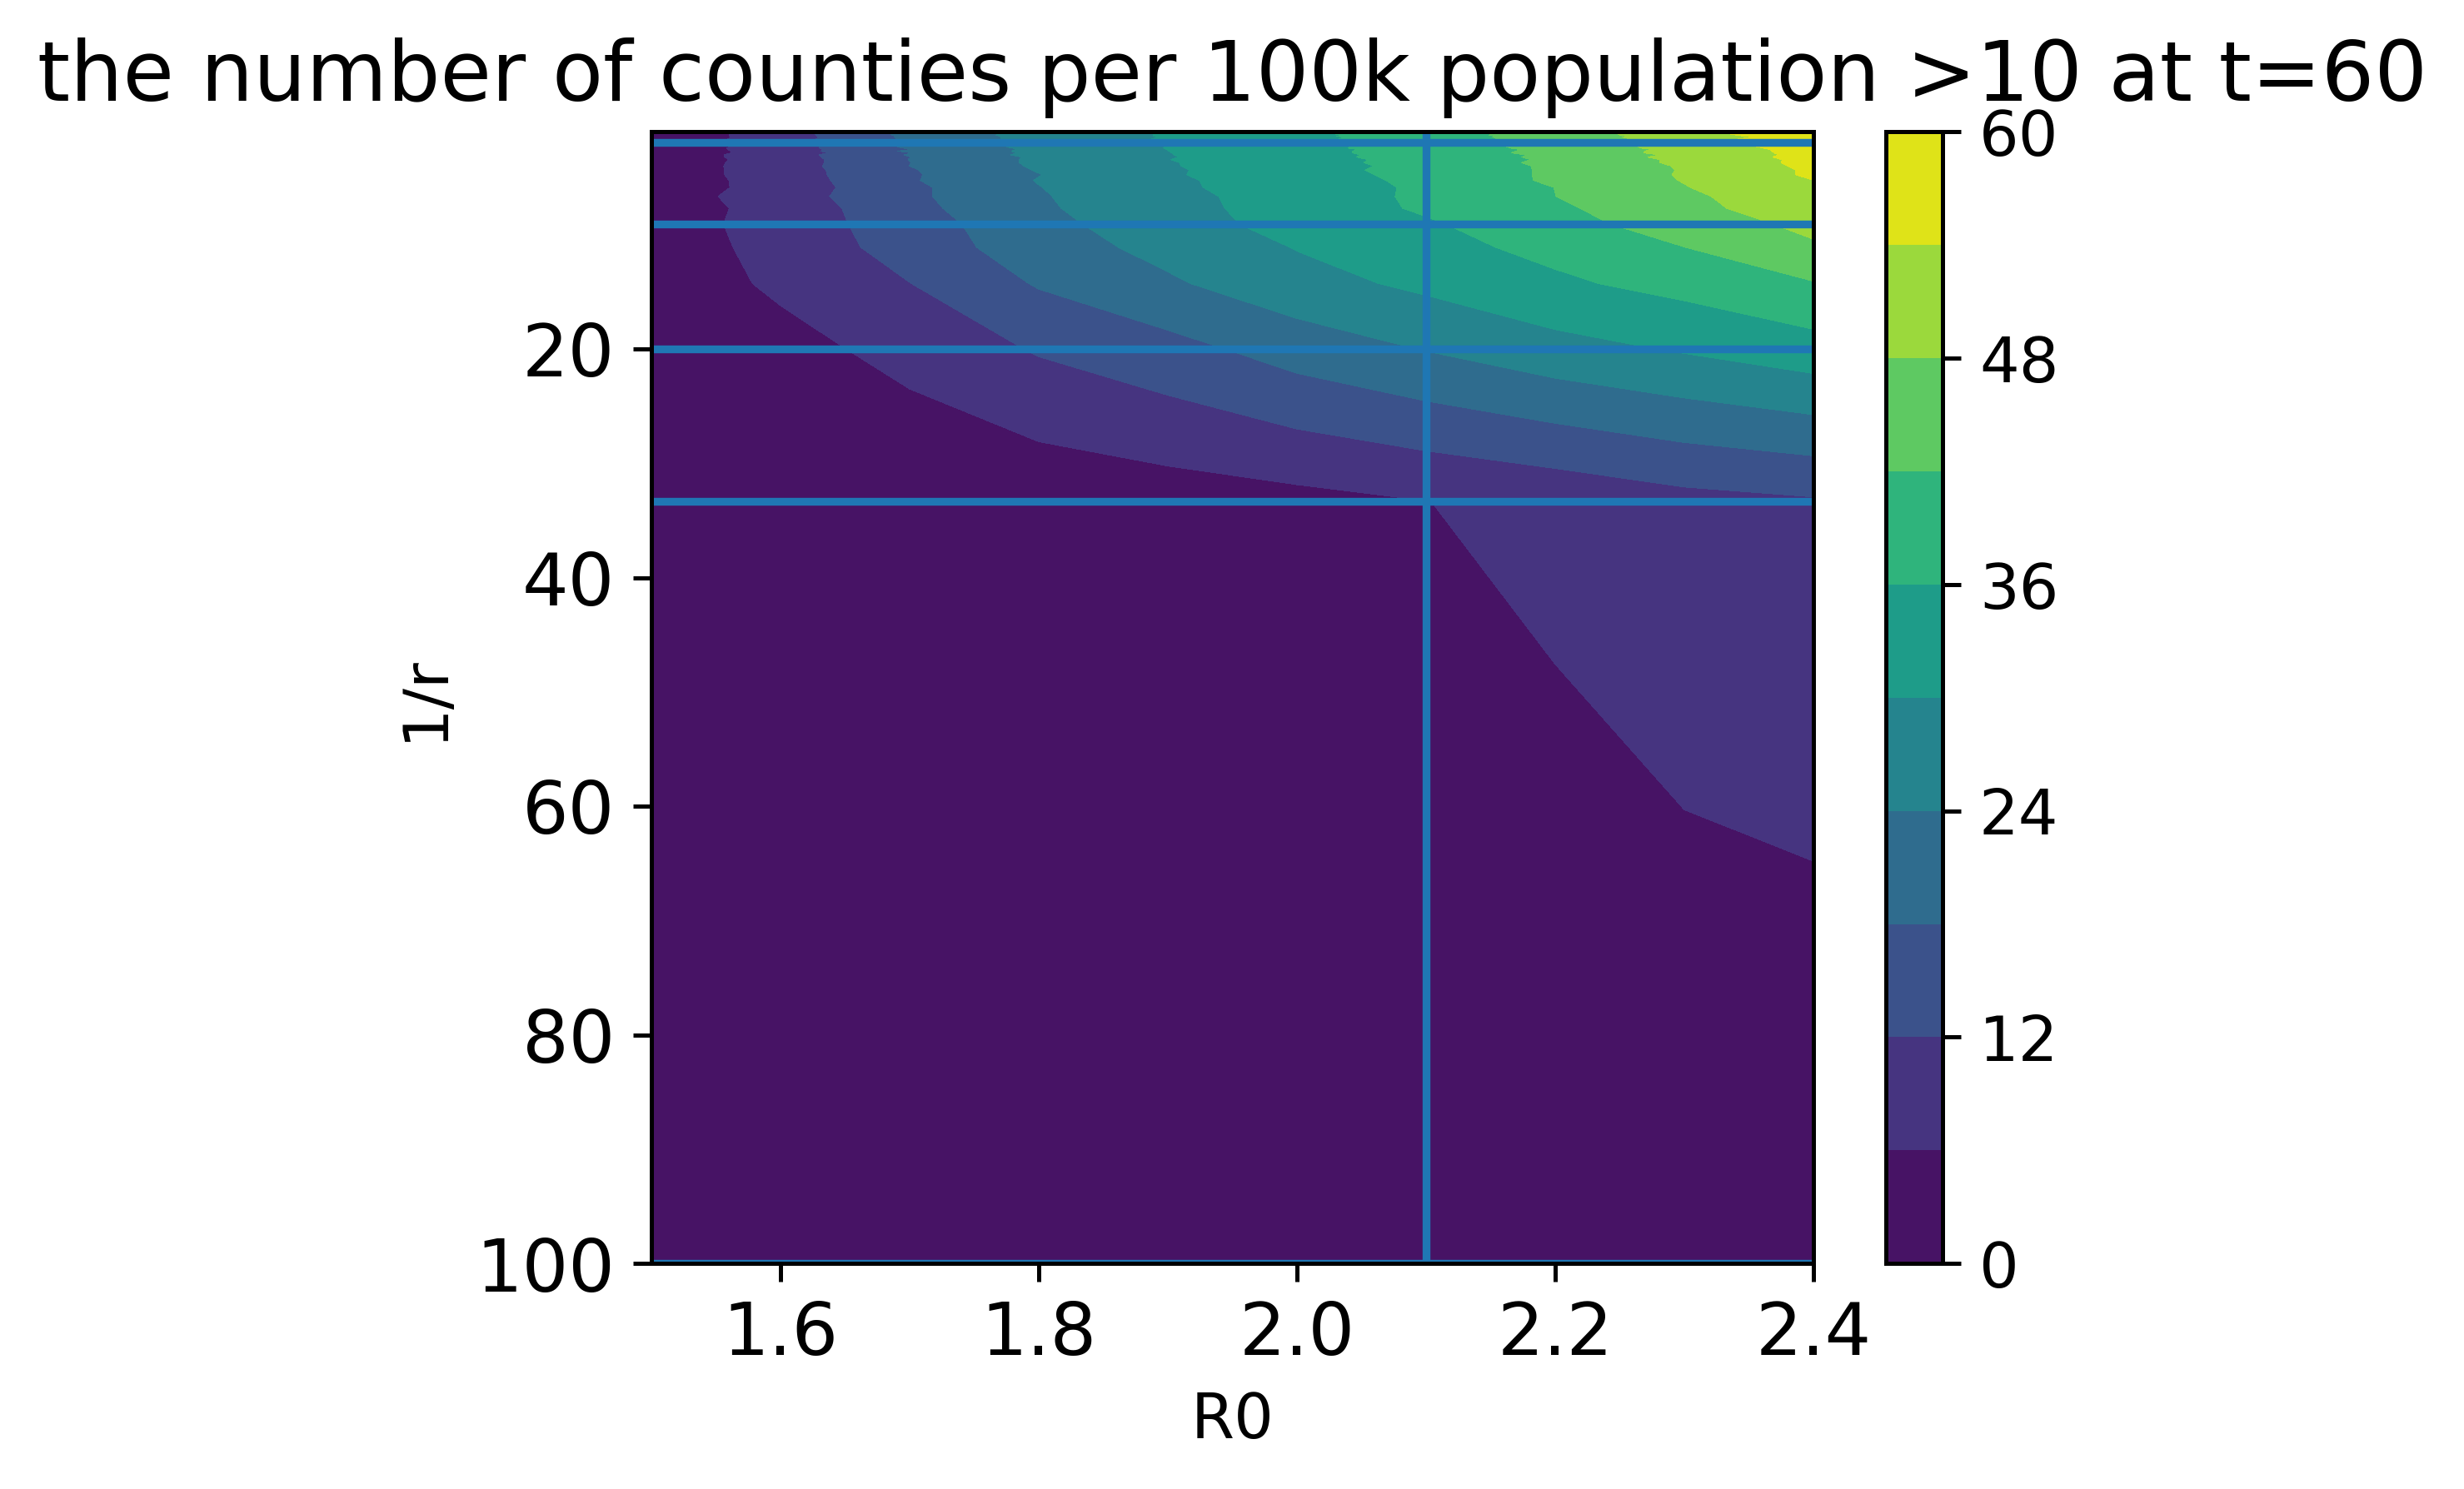

In [6]:
y = 1/rs[:50]
x = R0s[:10]

X, Y = np.meshgrid(x, y)

Z = Numcounty_mean[:,:10]


fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.viridis,vmin=0) #vmax=36

# contour = ax2.imshow(Z,cmap=plt.cm.coolwarm)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
# cbh.ax.set_yticklabels([10, 50, 100])
cbh.ax.tick_params(labelsize=12)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
plt.title('the number of counties per 100k population >10 at t=60', fontsize=16)
plt.xlabel('R0', fontsize=12)
plt.ylabel('1/r', fontsize=12)
# ax2.set_xticklabels([1/0.2,1/0.4,])

# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.axvline(7)
plt.axvline(2.1)
plt.axhline(1/0.01)
plt.axhline(1/0.03)
plt.axhline(1/0.05)
plt.axhline(1/0.11)
plt.axhline(1/0.51)
plt.show()
# plt.yscale('log')

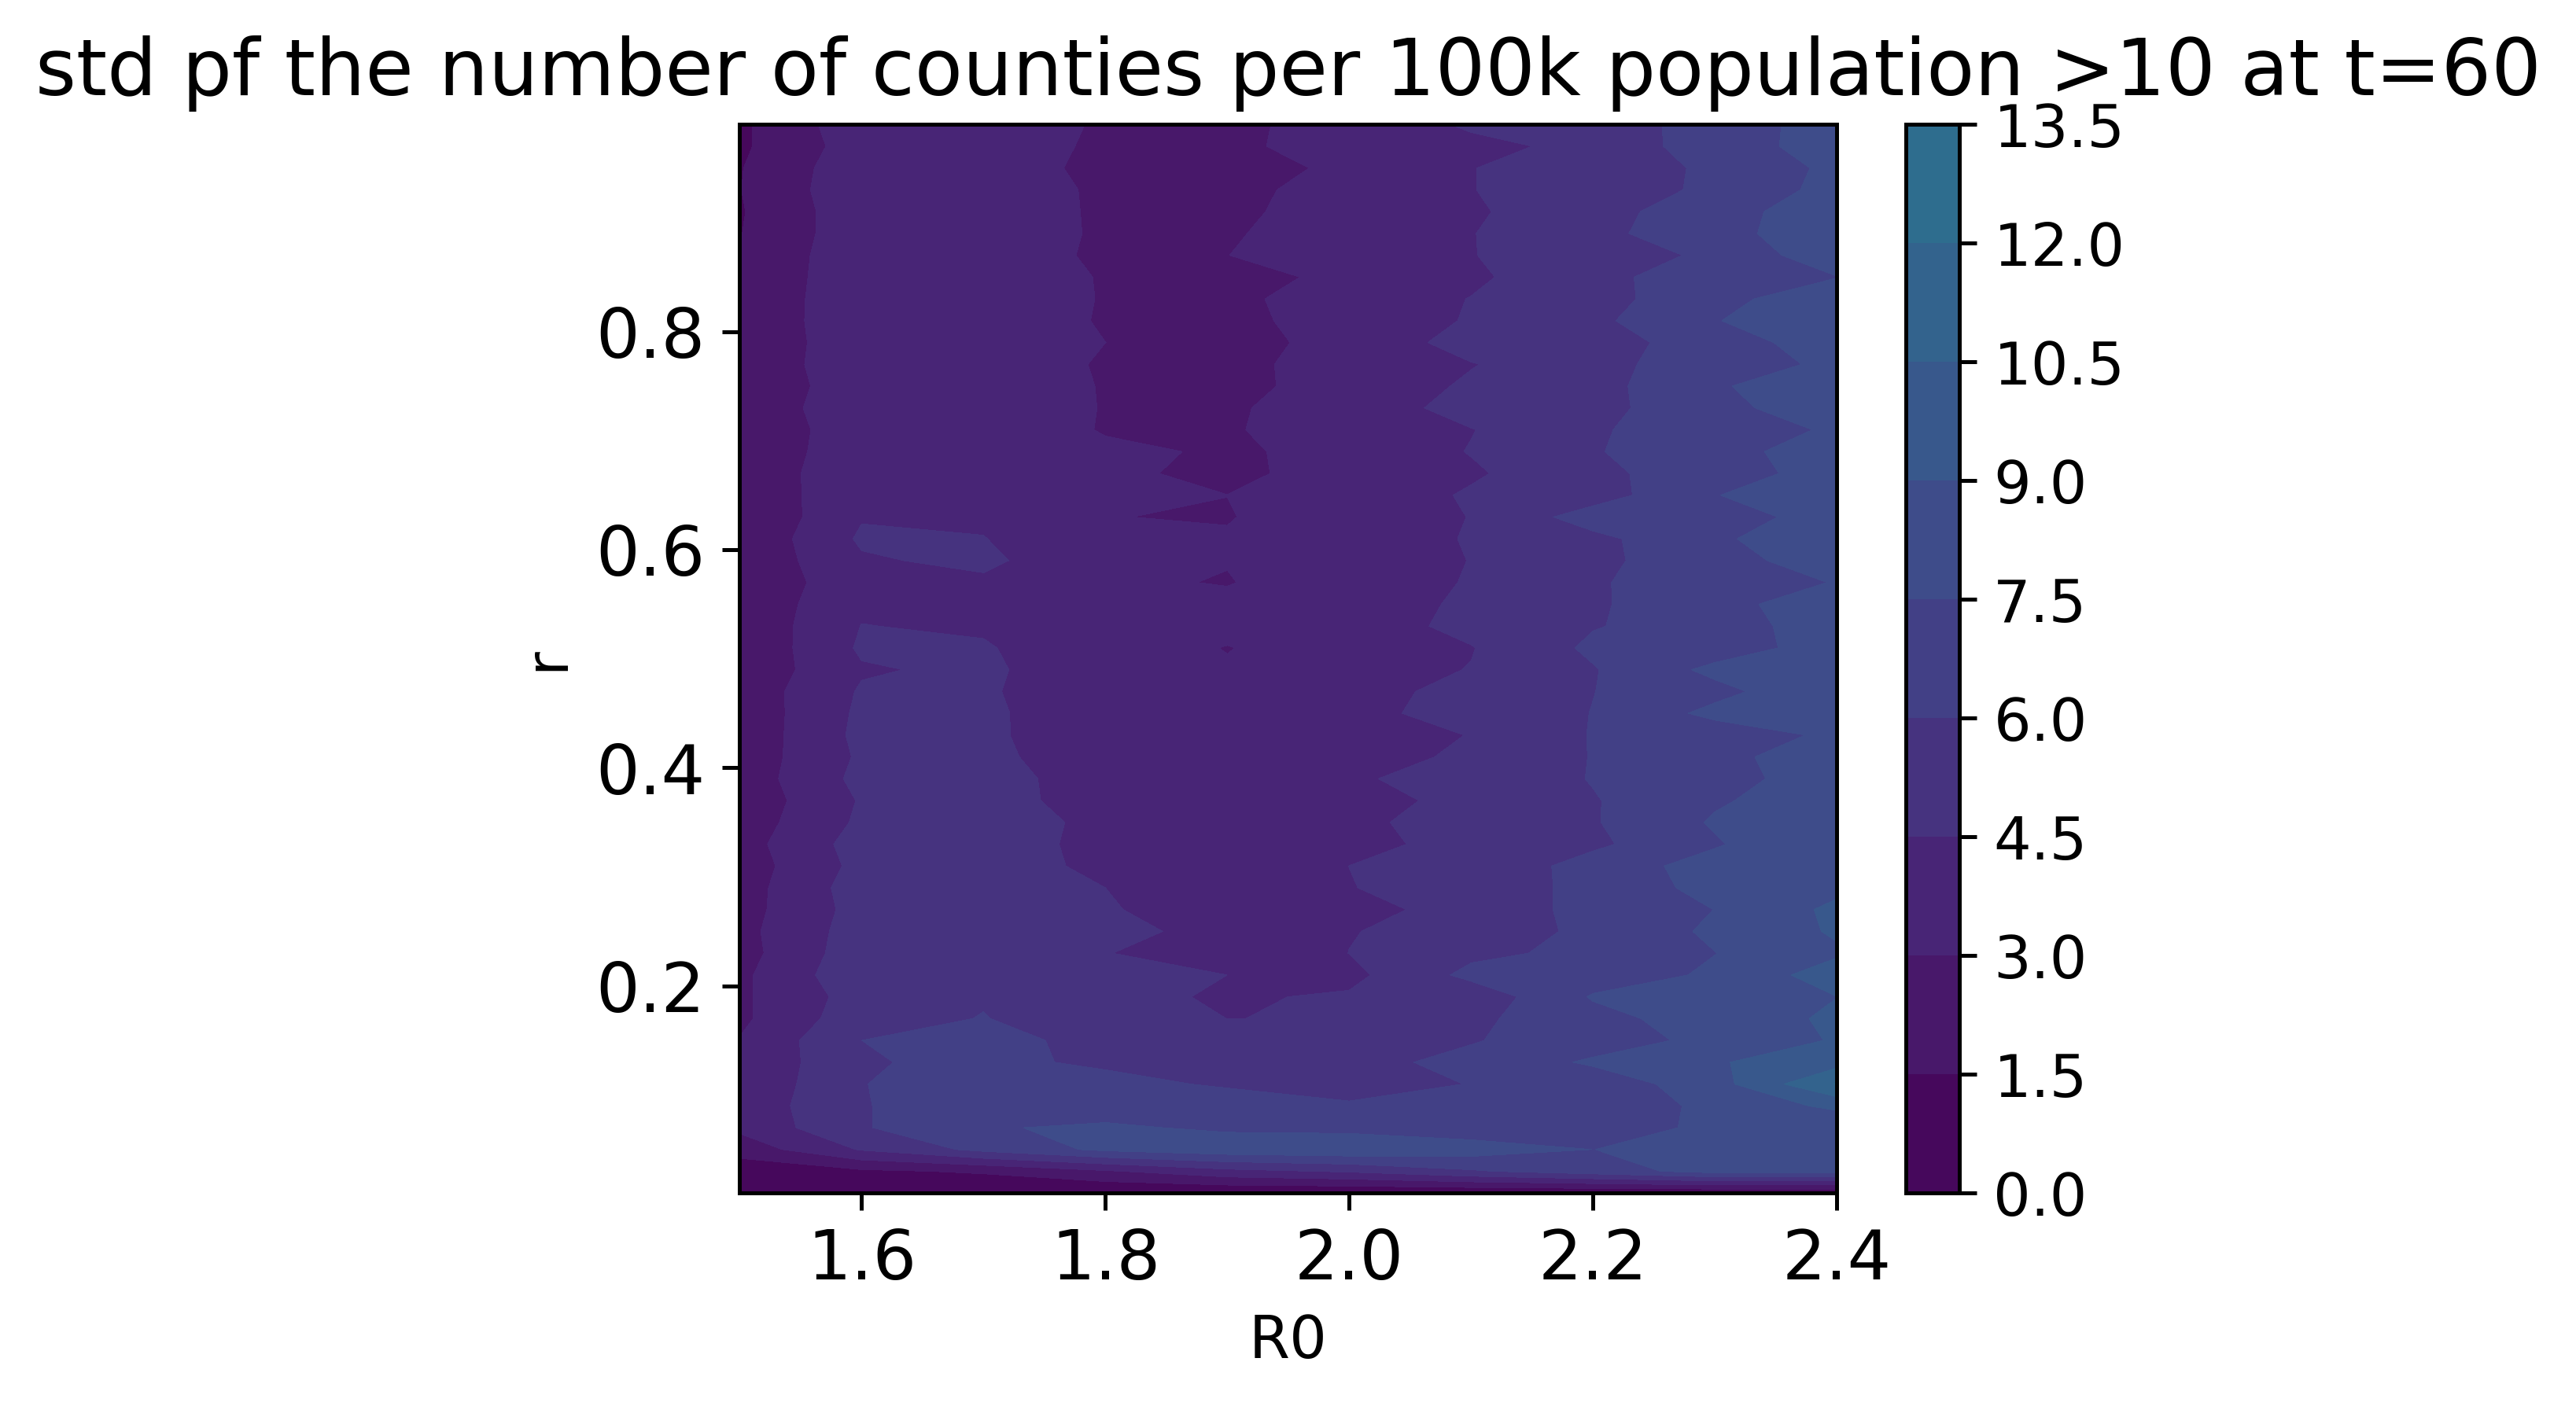

In [8]:
y = rs[:50]
x = R0s[:10]

X, Y = np.meshgrid(x, y)

Z = Numcounty_std


fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.viridis,vmin=0, vmax=36)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
# cbh.ax.set_yticklabels([10, 50, 100])
cbh.ax.tick_params(labelsize=12)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
plt.title('std pf the number of counties per 100k population >10 at t=60', fontsize=16)
plt.xlabel('R0', fontsize=12)
plt.ylabel('r', fontsize=12)

# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [14]:
np.savetxt('Numcounty_mean60-1.txt', Numcounty_mean)
np.savetxt('Numcounty_std60-1.txt', Numcounty_std)

In [15]:
Numcounty_mean =  np.zeros((50,10))
Numcounty_std =  np.zeros((50,10))

In [16]:
Numcounty_mean[:,:6] = np.loadtxt('Numcounty_mean40.txt')
Numcounty_std[:,:6] = np.loadtxt('Numcounty_std40.txt')

In [17]:
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
for i in range(50):
    for j in range(6,10):
        R0 = R0s[j]
        r = rs[i]
        temp = np.zeros((500,3142,60))
        f = gzip.GzipFile(save_dir+"NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2)), "r")
        temp = np.load(f)

        E_daily_per_pop = temp/pop[None,:,None]*100000
        num_county = np.sum(E_daily_per_pop>10,axis=1)

        mean_county = np.mean(num_county,axis=0)[39]
        Numcounty_mean[i,j] = mean_county

        std_county = np.std(num_county,axis=0)[39]
        Numcounty_std[i,j] = std_county

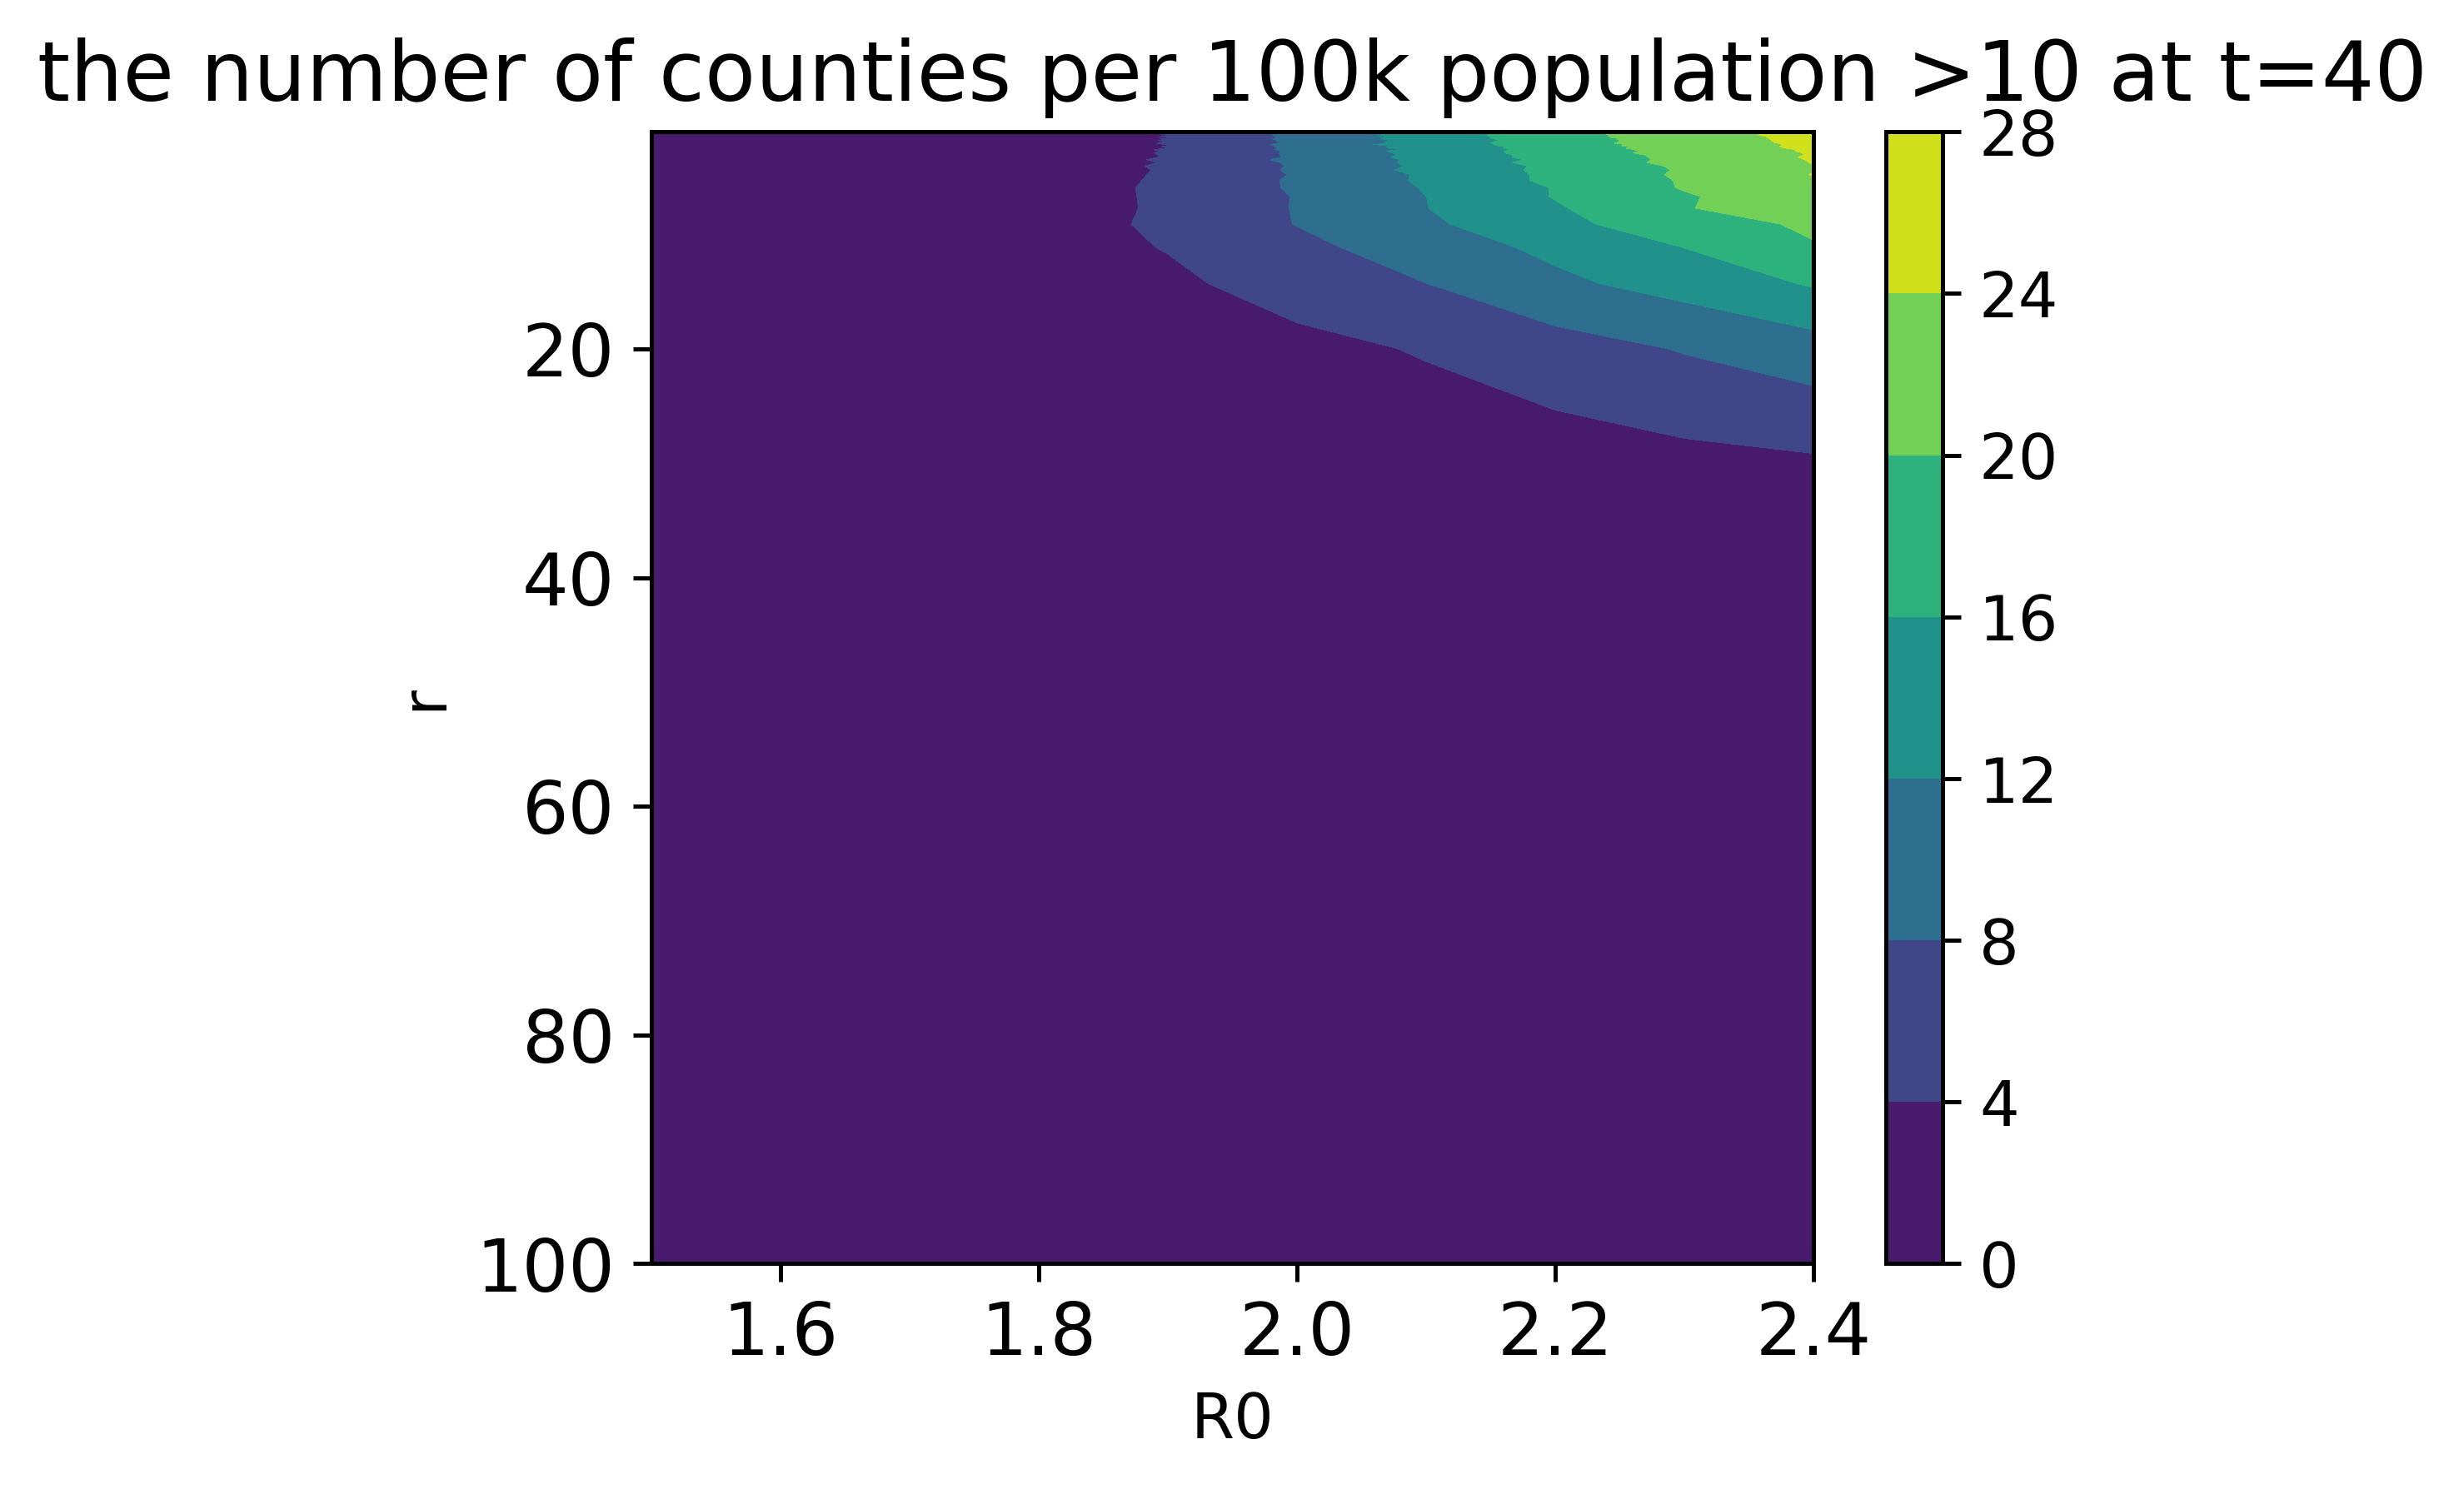

In [18]:
y = 1/rs[:50]
x = R0s[:10]

X, Y = np.meshgrid(x, y)

Z = Numcounty_mean


fig1, ax2 = plt.subplots(figsize=(5, 4), dpi=450)
contour = ax2.contourf(X, Y, Z, cmap=plt.cm.viridis)

# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
# cbh.ax.set_yticklabels([10, 50, 100])
cbh.ax.tick_params(labelsize=12)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
plt.title('the number of counties per 100k population >10 at t=40', fontsize=16)
plt.xlabel('R0', fontsize=12)
plt.ylabel('r', fontsize=12)

# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [19]:
np.savetxt('Numcounty_mean40-1.txt', Numcounty_mean)
np.savetxt('Numcounty_std40-1.txt', Numcounty_std)